# Import Python Libraries

In [34]:
#importing basic libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [35]:
# for timeseries RNN neutral network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  LSTM
from tensorflow.keras.layers import  Dropout

In [36]:
#import keras: TimeseriesGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# impoer keras: MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Data Set: AMZN(Amazon: 01/01 2014- 12/30/2019)

In [45]:
#importing dataset
dir_path_dataset_1 = '/home/reeyabhusal/AMZN.csv'

In [46]:
df_ALL = pd.read_csv(dir_path_dataset_1)

In [47]:
df_ALL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


# Exploratory Data Analysis (EDA)

In [48]:
df_ALL.shape

(1509, 7)

In [49]:
df_ALL.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [50]:
#Statistics Summary

df_ALL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,984.302737,993.211908,973.640922,983.886395,983.886395,4.173460e+06
std,566.829330,571.618465,560.593245,566.330520,566.330520,2.291850e+06
min,284.399994,290.420013,284.000000,286.950012,286.950012,8.813000e+05
25%,439.350006,444.720001,435.579987,439.390015,439.390015,2.722900e+06
50%,818.000000,821.650024,812.500000,817.880005,817.880005,3.561300e+06
75%,1604.000000,1622.719971,1590.719971,1602.910034,1602.910034,4.808800e+06
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,2.385610e+07


# Keep Only "Close" and filter out all other attributes

In [56]:
df= df_ALL.iloc[:,4:5]

In [57]:
df.head()

,Close
0,397.970001
1,396.440002
2,393.630005
3,398.029999
4,401.920013


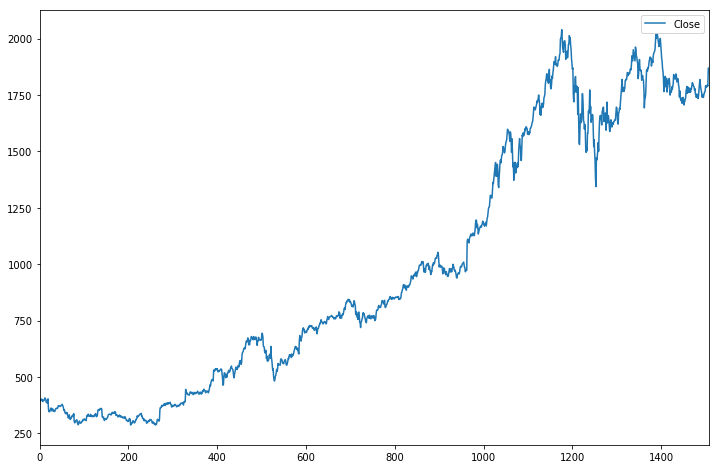

In [58]:
df.plot(figsize=(12,8))

# Length of Input Time Series = Number of input steps

In [60]:
#set the length of the input sequence
#i.e the number of series that are used to predict future
# 60 consecutive closing prices will be used to predict the next one
length60= 60

In [61]:
length60

60

# Split Data into Test/Train

In [62]:
len(df)

1509

In [63]:
#set percentage of data used for testing
 test_percent = 0.1

In [64]:
# Numbers of data points reserved for testing model

len(df)*test_percent

150.9

# Split Data into Train and Test

In [65]:
# to find the length of the testing dataset

test_length = np.round(len(df)*test_percent)

In [66]:
test_length

151.0

In [70]:
# The testing dataset starts at this index
# index starting with 0

split_index= int(len(df) - test_length)

In [71]:
split_index

1358

In [72]:
# seperate train and testing dataset
#Training dataset: All the indices from start to test_start_inder excluding test_start_index

data_train = df.iloc[: split_index]
 
# Testing dataset: All dataset indices from test_start_index to the end of the dataframe including test_start_index

data_test = df.iloc[split_index - length60:]
    
    

In [74]:
data_train.head(5)

,Close
0,397.970001
1,396.440002
2,393.630005
3,398.029999
4,401.920013


In [75]:
data_train.tail(5)

,Close
1353,1858.969971
1354,1857.520020
1355,1859.680054
1356,1815.479980
1357,1823.280029


In [76]:
data_test.head(5)

,Close
1298,1671.729980
1299,1696.170044
1300,1692.430054
1301,1668.949951
1302,1625.949951


In [77]:
data_test.tail(5)

,Close
1504,1793.000000
1505,1789.209961
1506,1868.770020
1507,1869.800049
1508,1846.890015


# Normalize Data (Scale it into range[0,1]

In [78]:
#create a MinMaxScaler to normalize data
scaler= MinMaxScaler()


In [79]:
# Ignore the warning : Just converting the data to floats
#Only Scale training data

#Train the scaler to perform the normalization
scaler.fit(data_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [80]:
#Normalize the training dataset
normalized_train = scaler.transform(data_train)

#Normalize the testing dataset
normalized_test = scaler.transform(data_test)


# Create TimeseriesGenerator Instances

In [83]:
# TimeseriesGenerator: Generate time series batch for training/testing 
#set the length of the input sequence
# 60 histirical data points to predict new one

#batch_size: Number of the time series samples in each batch

batch_size32= 32

#Create a TimeseriesGenerator for training :train_tsGenerator
# It produces time series batchs used to train model
# TimeseriesGenerator(input dataset,outputs dataset, length, batch_size)
train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length= length60, batch_size=batch_size32)


In [84]:
len(normalized_train)

1358

In [85]:
len(train_tsGenerator60)

41

In [87]:
#look of first batch
x,y= train_tsGenerator60[0]

In [88]:
#print x.flatten()

x.flatten()

array([0.06334733, 0.06247432, 0.06087095, ..., 0.00301843, 0.00907813,
       0.01009381])

In [89]:
#print y
y

array([[0.02819874],
       [0.03197607],
       [0.03138836],
       [0.02662961],
       [0.0205699 ],
       [0.01758   ],
       [0.02289222],
       [0.02559683],
       [0.0172091 ],
       [0.01413932],
       [0.01652439],
       [0.01662139],
       [0.0209579 ],
       [0.02165974],
       [0.02506047],
       [0.02417606],
       [0.02147143],
       [0.0286438 ],
       [0.00963161],
       [0.0054948 ],
       [0.00766307],
       [0.0098028 ],
       [0.01194824],
       [0.01201671],
       [0.0131807 ],
       [0.00595129],
       [0.00328661],
       [0.00078171],
       [0.00301843],
       [0.00907813],
       [0.01009381],
       [0.00608823]])

# Build LSTM Model

In [90]:
# Data set : Only one column/attribute: Sine values of index x
#Features: How many features used to train the model: only one

n_features = 1

#define model
model = Sequential()

#Add a LSTM layer: Using SimpleRNN cells

model.add(LSTM(50,activation='relu',return_sequences= True, input_shape=(length60, n_features)))

#dropout layer
model.add(Dropout(0.2))

#Add 2nd LSTM model
model.add(LSTM(units=50,activation='relu',return_sequences= True))

#dropout layer
model.add(Dropout(0.2))

#Add 3rd LSTM model
model.add(LSTM(units=50,activation='relu'))



# Add a fully connected (FC) layer for the final prediction

model.add(Dense(1))



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


# Compile Model

In [91]:
#compile the model
#Loss function : mse ( mean squared error)
 #optimizer :Adam

model.compile(optimizer= 'adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
____________________________________________________

# Train (Fit) Model

In [92]:
# Fit the model
# Use fit_generator(), Not fot()

model.fit_generator(train_tsGenerator60, epochs= 100)


Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
41/41 [==============================] - 11s 261ms/step - loss: 0.1139
Epoch 2/100
41/41 [==============================] - 7s 162ms/step - loss: 0.0103
Epoch 3/100
41/41 [==============================] - 6s 155ms/step - loss: 0.0133
Epoch 4/100
41/41 [==============================] - 6s 152ms/step - loss: 0.0178
Epoch 5/100
41/41 [==============================] - 6s 154ms/step - loss: 0.0025
Epoch 6/100
41/41 [==============================] - 6s 151ms/step - loss: 0.0019
Epoch 7/100
41/41 [==============================] - 6s 150ms/step - loss: 0.0017
Epoch 8/100
41/41 [==============================] - 6s 149ms/step - loss: 0.0019
Epoch 9/100
41/41 [==============================] - 6s 152ms/step - loss: 0.0014
Epoch 10/100
41/41 [==============================] - 6s 151ms/step - loss: 0.0017
Epoch 11/100
41/41 [==============================] - 6s 150ms/step - loss: 0.0015
E

# Visualize Model's Performance after Training

In [93]:
loss_history_keys = model.history.history.keys()

#model.history.history is a dict, "loss": key

loss_history_keys

dict_keys(['loss'])

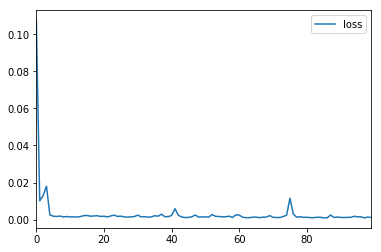

In [94]:
#load the loss data into data frame
df_model_loss = pd.DataFrame(model.history.history)

#visualize the loss data using DataFrame.plot()
df_model_loss.plot()

# Prediction for Testing: Using TimeseriesGenerator

## Create TimeseriesGenerator for Testing

In [95]:
#batch size must be 1

batch_size1=1 

#create a Create TimeseriesGenerator for Testing: test_tGenerator

test_tsGenerator60 = TimeseriesGenerator(normalized_test, normalized_test, length=length60,batch_size=batch_size1)

# Predict future Data Points for testing

In [96]:
normalized_prediction= model.predict_generator(test_tsGenerator60)

In [97]:
#prediction is a numpy 2D array with one cloumn

normalized_prediction

array([[0.87579405],
       [0.873674  ],
       [0.8715311 ],
       [0.86939585],
       [0.8668522 ],
       [0.8629737 ],
       [0.8582145 ],
       [0.8530909 ],
       [0.8481808 ],
       [0.8443297 ],
       [0.8423101 ],
       [0.8421396 ],
       [0.84341097],
       [0.84582216],
       [0.84896606],
       [0.8526356 ],
       [0.85670227],
       [0.86100334],
       [0.8654125 ],
       [0.8696726 ],
       [0.87363595],
       [0.876845  ],
       [0.87940913],
       [0.8814755 ],
       [0.8830342 ],
       [0.88442653],
       [0.8858795 ],
       [0.8874698 ],
       [0.8891972 ],
       [0.8910812 ],
       [0.89340454],
       [0.89639634],
       [0.8997531 ],
       [0.9033123 ],
       [0.90697193],
       [0.91045815],
       [0.9134369 ],
       [0.9156743 ],
       [0.91704756],
       [0.91785383],
       [0.9183653 ],
       [0.9187842 ],
       [0.91892517],
       [0.9184848 ],
       [0.9171917 ],
       [0.91502637],
       [0.91190785],
       [0.907

In [98]:
len(normalized_prediction)

151

In [99]:
#convert normalized prediction back to true values

prediction = scaler.inverse_transform(normalized_prediction)

In [101]:
#flatten all 2D array

#data_train = data_train.reshape((-1))
#data_test= data_test.reshape((-1))
#prediction = prediction.reshape((-1))

prediction_index = np.arange(1358, 1509, step=1)
df_prediction= pd.DataFrame(data=prediction, index=prediction_index, columns=['Prediction'])

In [102]:
df_prediction

,Prediction
1358,1821.831665
1359,1818.115967
1360,1814.360596
1361,1810.618408
1362,1806.160522
...,...
1504,1751.044434
1505,1753.412354
1506,1755.833130
1507,1759.542725


# Visualize Prediction

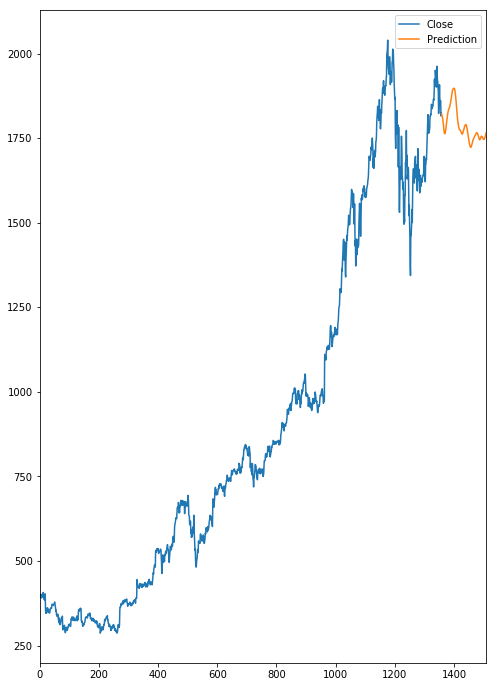

In [103]:
ax= data_train.plot()
df_prediction.plot(ax=ax, figsize=(8,12))

# Visulaize prediction and compare actual close price

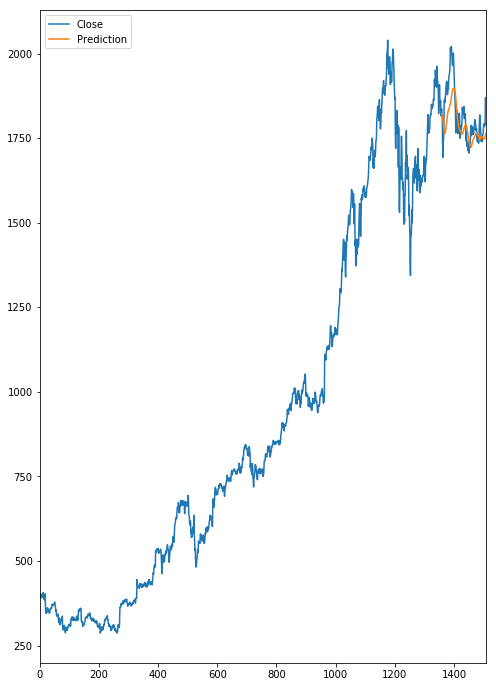

In [104]:
ax= df.plot()
df_prediction.plot(ax=ax, figsize=(8,12))


# Timeseries Forecasting with LSTM
## Preprocess Full Input Dataset

In [105]:
full_scaler= MinMaxScaler()
normalized_full_data= full_scaler.fit_transform(df)

## Create TimeseriesGenarator for Forcasting

In [106]:
#Number of time steps of the input time series
#still use length60:

length60

60

In [107]:
# Create TimeseriesGenarator for Forcasting

forecast_tsGenerator= TimeseriesGenerator(normalized_full_data, normalized_full_data, length=length60, batch_size=batch_size32)

# Bulid, compile and fit LSTM Model for Forecasting

In [108]:
#Train/fit LSTM Model
#in forecasting, we dont validate, only forecast

model.fit_generator(forecast_tsGenerator, epochs= 100)

Epoch 1/100
46/46 [==============================] - 7s 146ms/step - loss: 0.0012
Epoch 2/100
46/46 [==============================] - 7s 143ms/step - loss: 0.0013
Epoch 3/100
46/46 [==============================] - 7s 142ms/step - loss: 0.0010
Epoch 4/100
46/46 [==============================] - 7s 142ms/step - loss: 0.0017
Epoch 5/100
46/46 [==============================] - 7s 143ms/step - loss: 0.0014
Epoch 6/100
46/46 [==============================] - 7s 142ms/step - loss: 0.0012
Epoch 7/100
46/46 [==============================] - 8s 171ms/step - loss: 0.0012
Epoch 8/100
46/46 [==============================] - 7s 142ms/step - loss: 0.0015
Epoch 9/100
46/46 [==============================] - 6s 141ms/step - loss: 0.0014
Epoch 10/100
46/46 [==============================] - 7s 144ms/step - loss: 0.0012
Epoch 11/100
46/46 [==============================] - 7s 144ms/step - loss: 0.0011
Epoch 12/100
46/46 [==============================] - 7s 144ms/step - loss: 0.0015
Epoch 13/100


# Time series Forecasting using LSTM Neural Network: 01/01/2020-04/16/2020

In [158]:
forecast= []

#set peroid with time span of forecasting
#forecast for next 73 business days

Periods =73

first_eval_batch= normalized_full_data[-length60:]
current_batch= first_eval_batch.reshape((1,length60, n_features))
for i in range(Periods):
    
    #get prediction 1 time stamp ahead([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    #store prediction
    forecast.append(current_pred)
    
    # update batch to now include preduction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis =1)

# Inverse to Transform Normalized Data Back into True Values

In [159]:
forecast = full_scaler.inverse_transform(forecast)
forecast

array([[1882.22382311],
       [1892.45627256],
       [1902.84750229],
       [1913.06898337],
       [1922.88254534],
       [1932.16001492],
       [1940.84466994],
       [1948.92011006],
       [1956.39281185],
       [1963.2792801 ],
       [1969.60385416],
       [1975.39285813],
       [1980.67982389],
       [1985.53379999],
       [1989.98393095],
       [1994.05789888],
       [1997.78014758],
       [2001.17459855],
       [2004.26444207],
       [2007.07265951],
       [2009.62108314],
       [2011.93018727],
       [2014.02034174],
       [2015.90961825],
       [2017.61598405],
       [2019.15531716],
       [2020.54297331],
       [2021.7925324 ],
       [2022.91736539],
       [2023.92875404],
       [2024.83787566],
       [2025.65475846],
       [2026.38786376],
       [2027.04607073],
       [2027.63679608],
       [2028.16620299],
       [2028.64097695],
       [2029.06665437],
       [2029.44804044],
       [2029.7898359 ],
       [2030.09621918],
       [2030.370

In [160]:
df

,Close
0,397.970001
1,396.440002
2,393.630005
3,398.029999
4,401.920013
...,...
1504,1793.000000
1505,1789.209961
1506,1868.770020
1507,1869.800049


# Creating new timestamp index with pandas 01/01/2020-06/15/2020

In [161]:
#Calculate forecast index

forecast_index= np.arange( 1509, 1582, step=1)

In [162]:
forecast_df = pd.DataFrame(data= forecast, index=forecast_index, columns=['Forecast'])

forecast_df

,Forecast
1509,1882.223823
1510,1892.456273
1511,1902.847502
1512,1913.068983
1513,1922.882545
...,...
1577,2032.616229
1578,2032.629287
1579,2032.640882
1580,2032.651537


# Plot the forecast

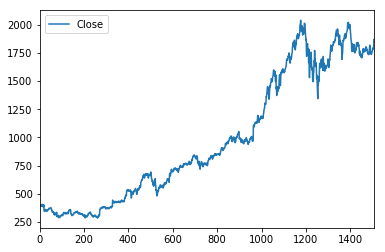

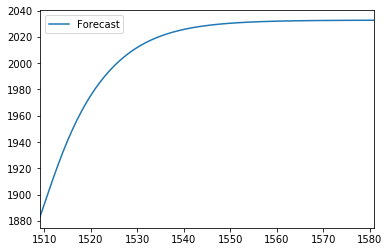

In [163]:
df.plot()
forecast_df.plot()

# Joining Pandas Plots

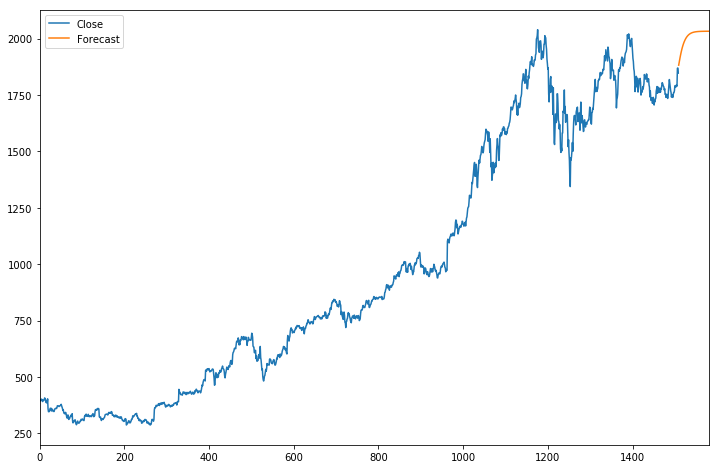

In [164]:
ax= df.plot()
forecast_df.plot(ax=ax, figsize=(12,8))

In [165]:
dir_path_dataset_2 = '/home/reeyabhusal/AMZN1.csv'

In [166]:
df_ALL_JAN_APRIL_2020 = pd.read_csv(dir_path_dataset_2)

In [167]:
df_ALL_JAN_APRIL_2020.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000
1,2020-01-03,1864.500000,1886.199951,1864.500000,1874.969971,1874.969971,3764400
2,2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,1902.880005,4061800
3,2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,1906.859985,4044900
4,2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,1891.969971,3508000


In [168]:
df_ALL_JAN_APRIL_2020.shape

(73, 7)

In [169]:
df_JAN_APRIL_2020 = df_ALL_JAN_APRIL_2020.iloc[:,4:5]

In [170]:
df_JAN_APRIL_2020


,Close
0,1898.010010
1,1874.969971
2,1902.880005
3,1906.859985
4,1891.969971
...,...
68,2042.760010
69,2168.870117
70,2283.320068
71,2307.679932


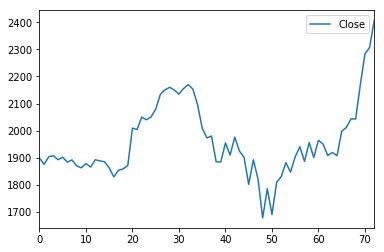

In [171]:
df_JAN_APRIL_2020.plot()

In [172]:
forecast_df['Forecast'].values

array([1882.22382311, 1892.45627256, 1902.84750229, 1913.06898337,
       1922.88254534, 1932.16001492, 1940.84466994, 1948.92011006,
       1956.39281185, 1963.2792801 , 1969.60385416, 1975.39285813,
       1980.67982389, 1985.53379999, 1989.98393095, 1994.05789888,
       1997.78014758, 2001.17459855, 2004.26444207, 2007.07265951,
       2009.62108314, 2011.93018727, 2014.02034174, 2015.90961825,
       2017.61598405, 2019.15531716, 2020.54297331, 2021.7925324 ,
       2022.91736539, 2023.92875404, 2024.83787566, 2025.65475846,
       2026.38786376, 2027.04607073, 2027.63679608, 2028.16620299,
       2028.64097695, 2029.06665437, 2029.44804044, 2029.7898359 ,
       2030.09621918, 2030.37042856, 2030.61632909, 2030.83642782,
       2031.03364965, 2031.2106061 , 2031.36886409, 2031.51061728,
       2031.63795489, 2031.75181707, 2031.85397965, 2031.94527832,
       2032.0274889 , 2032.10113371, 2032.16694396, 2032.22617319,
       2032.27923923, 2032.32697778, 2032.36949329, 2032.40772

In [173]:
df_JAN_APRIL_2020['Forecast']= forecast_df['Forecast'].values
df_JAN_APRIL_2020

,Close,Forecast
0,1898.010010,1882.223823
1,1874.969971,1892.456273
2,1902.880005,1902.847502
3,1906.859985,1913.068983
4,1891.969971,1922.882545
...,...,...
68,2042.760010,2032.616229
69,2168.870117,2032.629287
70,2283.320068,2032.640882
71,2307.679932,2032.651537


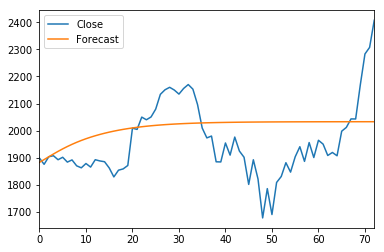

In [176]:
df_JAN_APRIL_2020.plot()